In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.signal import convolve2d

In [19]:
shape = (96,96)
dirac = np.zeros(shape)
dirac[shape[0]//2, shape[1]//2] = 1

In [20]:
gaussian_kernel = cv.GaussianBlur(dirac, (5,5), 0)

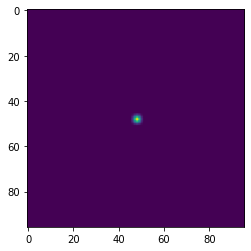

In [21]:
plt.imshow(gaussian_kernel)

In [22]:
dat = np.load('Data/Cat-SFG-17-01-2020.npz')
img1 = np.abs(fits.open('Data/psf2asec-96.psf.fits')[0].data[0,0,:,:])
gal = dat['listgal'][100,:,:]

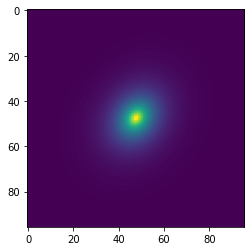

In [14]:
plt.imshow(gal)

In [15]:
SNR = 40                                                       
sigma_noise = np.linalg.norm(gal)/SNR 

gal_noise = gal + sigma_noise * np.random.randn(*shape)

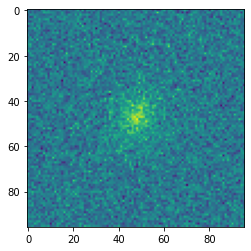

In [16]:
plt.imshow(gal_noise)

In [24]:
scipy_res = convolve2d(gal_noise, gaussian_kernel, mode='same')

blur_res = cv.GaussianBlur(gal_noise, (5,5), 0)

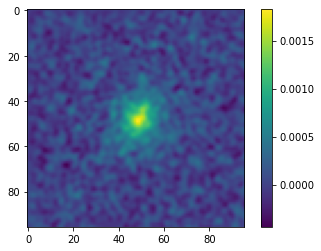

In [27]:
plt.imshow(scipy_res)
plt.colorbar()

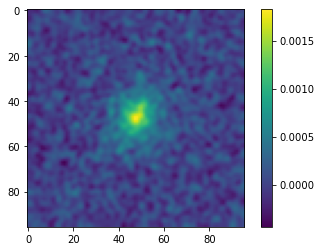

In [28]:
plt.imshow(blur_res)
plt.colorbar()

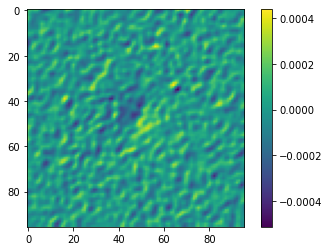

In [29]:
plt.imshow(scipy_res - blur_res)
plt.colorbar()